In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
web_events = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')

Convert the values in the timestamp field to datetimes.

In [3]:
web_events.timestamp = pd.to_datetime(web_events.timestamp, unit='ms')
web_events.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


Extract different time units from the timestamp field.

In [4]:
web_events.event.value_counts()

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

In [5]:
web_events['month']=web_events.timestamp.dt.month
web_events['week']=web_events.timestamp.dt.isocalendar().week
web_events['day']=web_events.timestamp.dt.day
web_events['hour']=web_events.timestamp.dt.hour
web_events.head()

,timestamp,visitorid,event,itemid,transactionid,month,week,day,hour
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,6,23,2,5
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,6,23,2,5
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,6,23,2,5
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,6,23,2,5
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,6,23,2,5


In [6]:
web_events.columns[5:9]

Index(['month', 'week', 'day', 'hour'], dtype='object')

Aggregate on each one, counting the number of records, and see what insights you can discover for each type of event.

In [7]:
time_units = web_events.columns[5:9]
for unit in time_units:
    display(pd.DataFrame(web_events.groupby(['event', unit]).size()))

0
event       month        
addtocart   5       14369
            6       15095
            7       17362
            8       14825
            9        7681
transaction 5        4611
            6        5043
            7        5802
            8        4632
            9        2369
view        5      571672
            6      590255
            7      674820
            8      533905
            9      293660

0
event     week        
addtocart 18       296
          19      3492
          20      3642
          21      3419
          22      3520
...                ...
view      34    122430
          35    123073
          36    115227
          37    134142
          38     62289

[63 rows x 1 columns]

0
event     day       
addtocart 1     1830
          2     1775
          3     2390
          4     2590
          5     2431
...              ...
view      27   82689
          28   77851
          29   78108
          30   71970
          31   52178

[93 rows x 1 columns]

0
event     hour        
addtocart 0       3725
          1       3578
          2       3337
          3       3266
          4       3141
...                ...
view      19    176363
          20    180880
          21    177577
          22    169633
          23    153853

[72 rows x 1 columns]

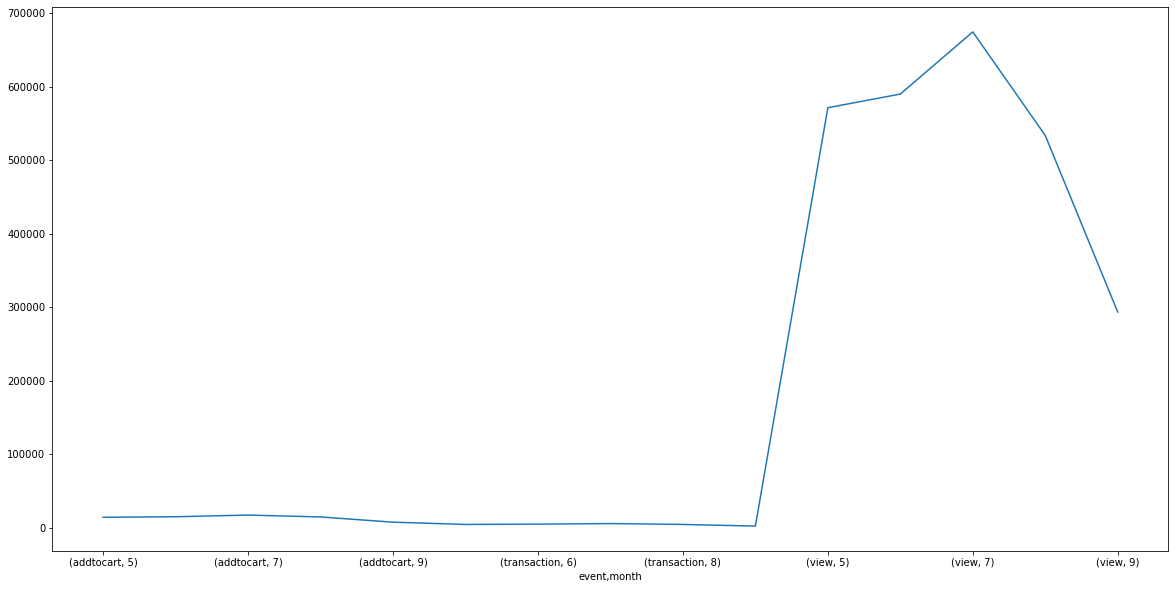

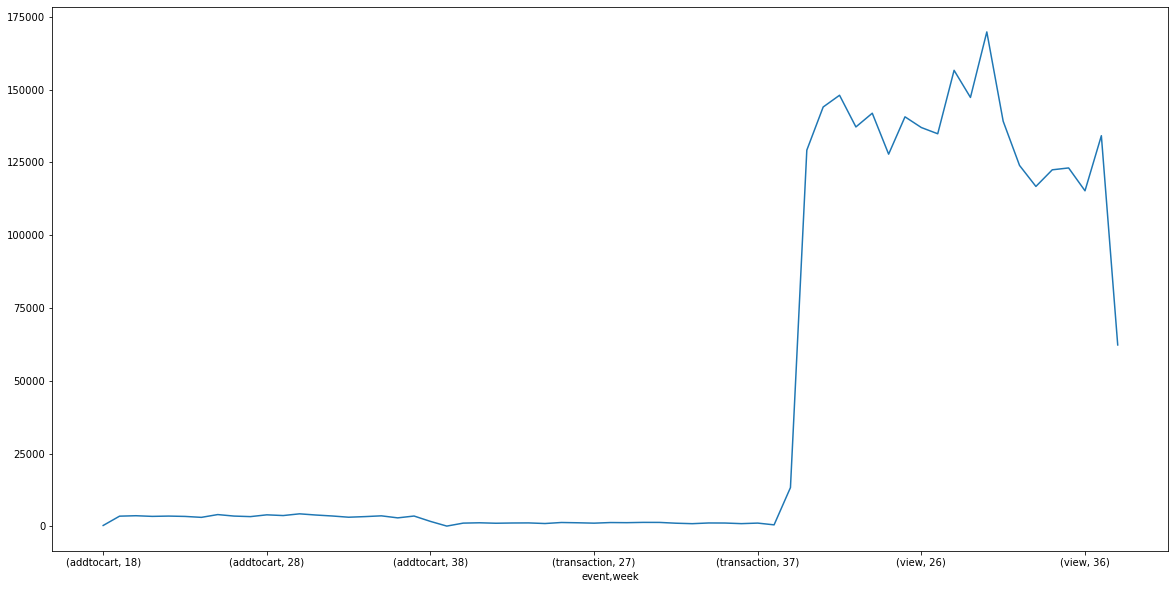

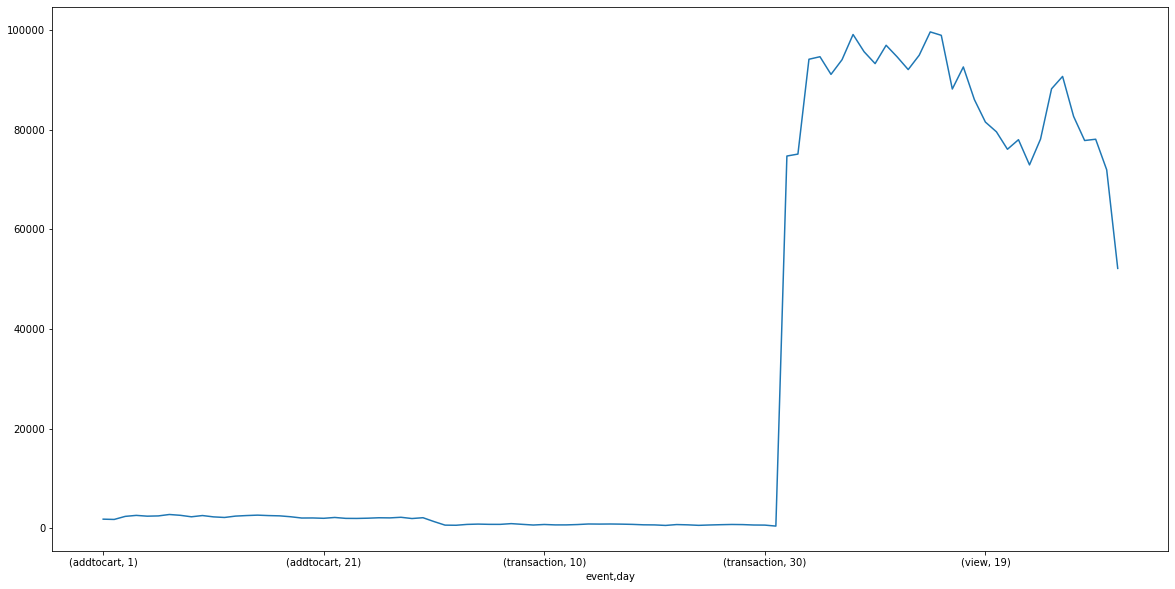

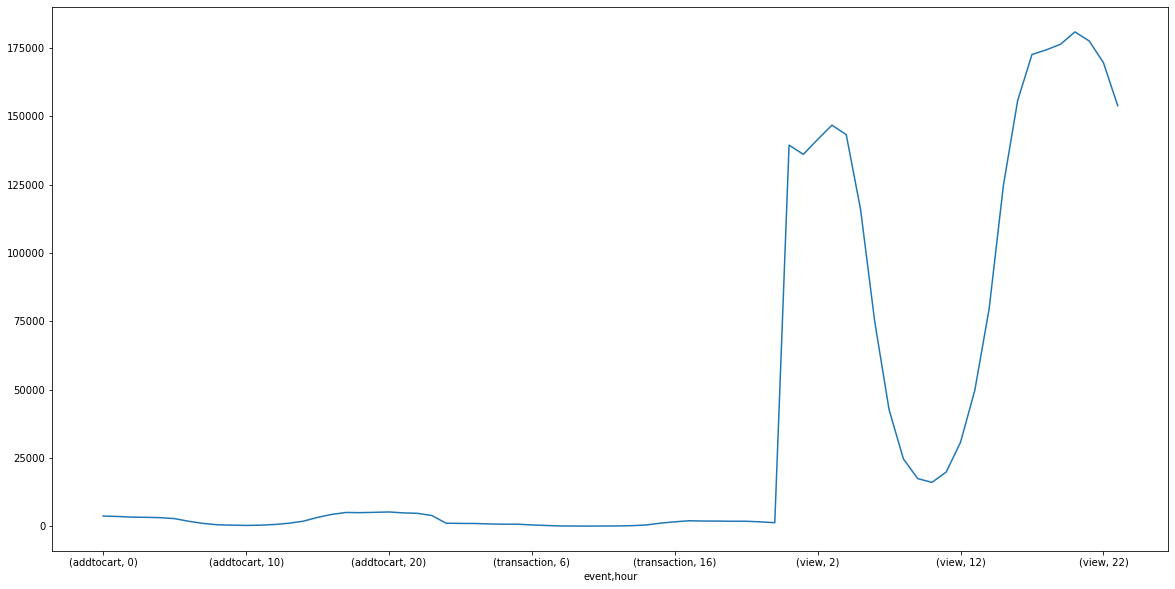

<Figure size 432x288 with 0 Axes>

In [8]:
for unit in time_units:
    ax=web_events.groupby(['event', unit]).size().plot(kind='line',figsize=(20,10))
    plt.figure()

In [9]:
life_exp = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv')
life_exp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Transform/melt the data so that the years are listed in a single column instead of separate columns.

In [10]:
ids = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

melted = pd.melt(life_exp,
                id_vars=ids, 
                var_name='Year',
                value_name='Value')
display(melted.head())
print(melted.shape)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,33.251
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.279
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN


(15048, 6)


Practice address missing values for countries using the different approaches (imputation, interpolation, and deletion).

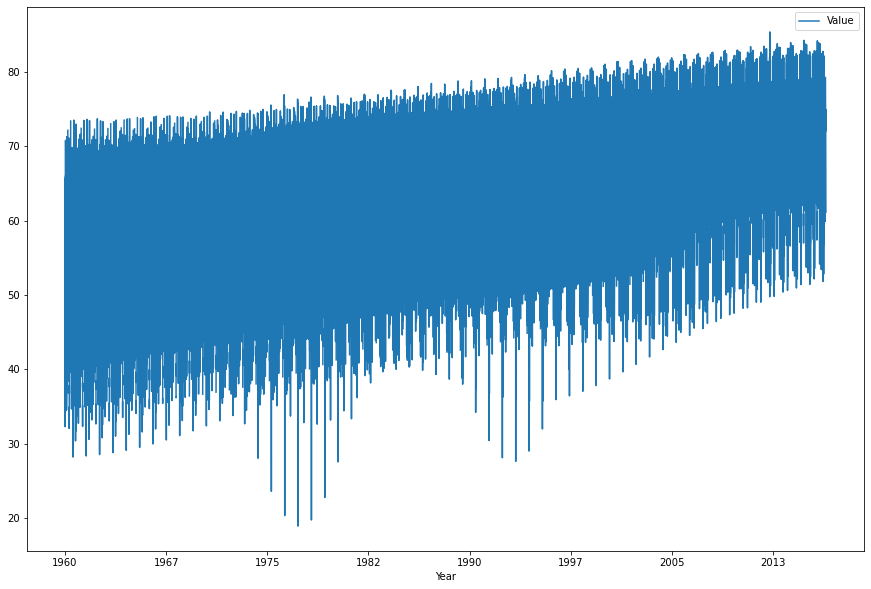

In [11]:
ax=melted.plot(x='Year', y='Value', figsize=(15,10))

In [12]:
#Deletion
dropped_df = melted.dropna(axis=0)
dropped_df.shape

(13747, 6)

In [13]:
#imputation
print(melted.Value.median())
print(melted.Value.mean())
imputed_df = melted.copy()
imputed_df['Value'] = imputed_df['Value'].fillna(imputed_df['Value'].median())
print(imputed_df.Value.median())
print(imputed_df.Value.mean())
imputed_df.head()

66.328
63.544405694009015
66.328
63.78506599385481


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,33.251
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.279
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,66.328


In [14]:
#interpolation
print(melted.isnull().sum().sum())
inter_df = melted.copy()
sorted_inter_df = inter_df.groupby(['Country Name']).apply(lambda x: x.sort_values(['Year'])).reset_index(drop=True)
print(sorted_inter_df.isnull().sum().sum())
sorted_inter_df.head()

1301
1301


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,32.742
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,33.185
3,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,33.624
4,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,34.060


In [15]:
sorted_inter_df = sorted_inter_df.apply(lambda group: group.interpolate(method='index'))
print(sorted_inter_df.isnull().sum().sum())

0
